In [100]:
#importing the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import regex
import xlrd
import plotly.express as px
import xlsxwriter
import datetime as dt
from datetime import datetime

In [101]:
# reading files and storing review dataset in df2
df2 = pd.read_csv('review_dataset.csv')
df2.head()

,product_name,product_url,category,status,stars
0,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0 star rating
1,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0 star rating
2,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0 star rating
3,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9 star rating
4,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9 star rating


In [102]:
# reading files and storing orders dataset in df3
df3 = pd.read_csv('orders_2016-2020_Dataset.csv')
df3.head()

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,Payment Method,Tracking #,Special Instructions,LineItem Name,LineItem SKU,LineItem Options,LineItem Add-ons,LineItem Qty,LineItem Sale Price,LineItem Type
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Samsung U Flex Wireless Bluetooth Flexible Hea...,PL000032123,NaN,NaN,1,₹ 699.00,physical
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Boat Rockerz 530 Bluetooth Headphone with Mic ...,NaN,NaN,NaN,1,₹ 799.00,physical
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,JBL Tempo On-Ear Headphone,PL000157,NaN,NaN,1,₹ 599.00,physical
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,NaN,NaN,NaN,Mi Neckband Bluetooth Headset with Mic (Black),PL000041332,NaN,NaN,1,₹ 699.00,physical


In [103]:
#checking data types of review dataset
df2.dtypes

product_name    object
product_url     object
category        object
status          object
stars           object
dtype: object

In [50]:
#checking data types oof orders dataset
df3.dtypes

Order #                             object
Order Date and Time Stamp           object
Fulfillment Status                  object
Payment Status                      object
Payment Date and Time Stamp         object
Fulfillment Date and Time Stamp     object
Currency                            object
Subtotal                            object
Shipping Method                     object
Shipping Cost                       object
Tax Method                          object
Taxes                               object
Total                               object
Coupon Code                         object
Coupon Code Name                    object
Discount                            object
Billing Name                        object
Billing Country                     object
Billing Street Address              object
Billing Street Address 2            object
Billing City                        object
Billing State                       object
Billing Zip                         object
Shipping Na

In [104]:
# checking null values of review dataset
df2.isnull().values.any()

True

In [105]:
# checking null values of orders dataset
df3.isnull().values.any()

True

In [106]:
#adding the null values of review data set
df2.isnull().sum()

product_name       0
product_url        0
category           0
status          1255
stars           1255
dtype: int64

In [107]:
#adding the null values of orders data set
df3.isnull().sum()

Order #                               0
Order Date and Time Stamp             0
Fulfillment Status                    0
Payment Status                        0
Payment Date and Time Stamp        2057
Fulfillment Date and Time Stamp    2068
Currency                              0
Subtotal                              0
Shipping Method                       0
Shipping Cost                         0
Tax Method                         2296
Taxes                                 0
Total                                 0
Coupon Code                        2140
Coupon Code Name                   2140
Discount                              0
Billing Name                       1967
Billing Country                    1967
Billing Street Address             1967
Billing Street Address 2           2100
Billing City                       1967
Billing State                      1975
Billing Zip                        1967
Shipping Name                         0
Shipping Country                      0


In [108]:
#dropping null values of review datasets
df4 = df2.dropna()

In [109]:
#dropping null values of order datasets
df5 = df3.dropna()

In [110]:
#checking null values after droping null values of order dataset
df5.isnull().sum()

Order #                            0.0
Order Date and Time Stamp          0.0
Fulfillment Status                 0.0
Payment Status                     0.0
Payment Date and Time Stamp        0.0
Fulfillment Date and Time Stamp    0.0
Currency                           0.0
Subtotal                           0.0
Shipping Method                    0.0
Shipping Cost                      0.0
Tax Method                         0.0
Taxes                              0.0
Total                              0.0
Coupon Code                        0.0
Coupon Code Name                   0.0
Discount                           0.0
Billing Name                       0.0
Billing Country                    0.0
Billing Street Address             0.0
Billing Street Address 2           0.0
Billing City                       0.0
Billing State                      0.0
Billing Zip                        0.0
Shipping Name                      0.0
Shipping Country                   0.0
Shipping Street Address  

# Enter 1 to see the analysis of Reviews given by Customers

In [111]:
# Grouping by stars and counting it to visualize analysis of reviews by plotly 
dfp = df4.groupby(['stars']).size().to_frame().sort_values([0], ascending = False).head(12).reset_index()
dfp.columns = ['stars', 'Count']
fig = px.bar(dfp, x='stars', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()

# Enter 2 to see the analysis of different payment methods used by the Customers

In [112]:
#dropping null values of payment method from order dataset
dfa1 = df3.dropna(subset=['Payment Method'])

In [113]:
# Grouping by payment methods and counting it to visualize analysis of payment methods by plotly
dfpm = dfa1.groupby(['Payment Method']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfpm.columns = ['Payment Method', 'Count']
fig = px.bar(dfpm, x='Payment Method', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()

# Enter 3 to see the analysis of Top Consumer States of India

In [114]:
#dropping null values of shipping state from order dataset
dfa2 = df3.dropna(subset=['Shipping State'])

In [115]:
#Grouping by shipping state and counting it to visualize analysis of top consumer states by plotly
dfpm = dfa1.groupby(['Shipping State']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfpm.columns = ['Shipping State', 'Count']
fig = px.bar(dfpm, x='Shipping State', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()

# Enter 4 to see the analysis of Top Consumer Cities of India

In [116]:
#dropping null values of shipping city from order dataset
dfa3 = df3.dropna(subset=['Shipping City'])

In [117]:
#Grouping by shipping city and counting it to visualize analysis of top consumer cities by plotly
dfc = dfa3.groupby(['Shipping City']).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
dfc.columns = ['Shipping City', 'Count']
fig = px.bar(dfc, x='Shipping City', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()

# Enter 5 to see the analysis of Top Selling Product Categories

In [118]:
#dropping null values of category from order dataset
df7 = df2.dropna(subset=['category'])

In [119]:
#Grouping by category and counting it to visualize analysis of top selling product categories by plotly
dfcat = df7.groupby(['category']).size().to_frame().sort_values([0], ascending = False).head(20).reset_index()
dfcat.columns = ['category', 'Count']
fig = px.bar(dfcat, x='category', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()

# Enter 6 to see the analysis of Reviews for All Product Categories

In [120]:
#dropping null values of category from order dataset
df7 = df2.dropna(subset=['stars'])

<AxesSubplot:xlabel='category'>

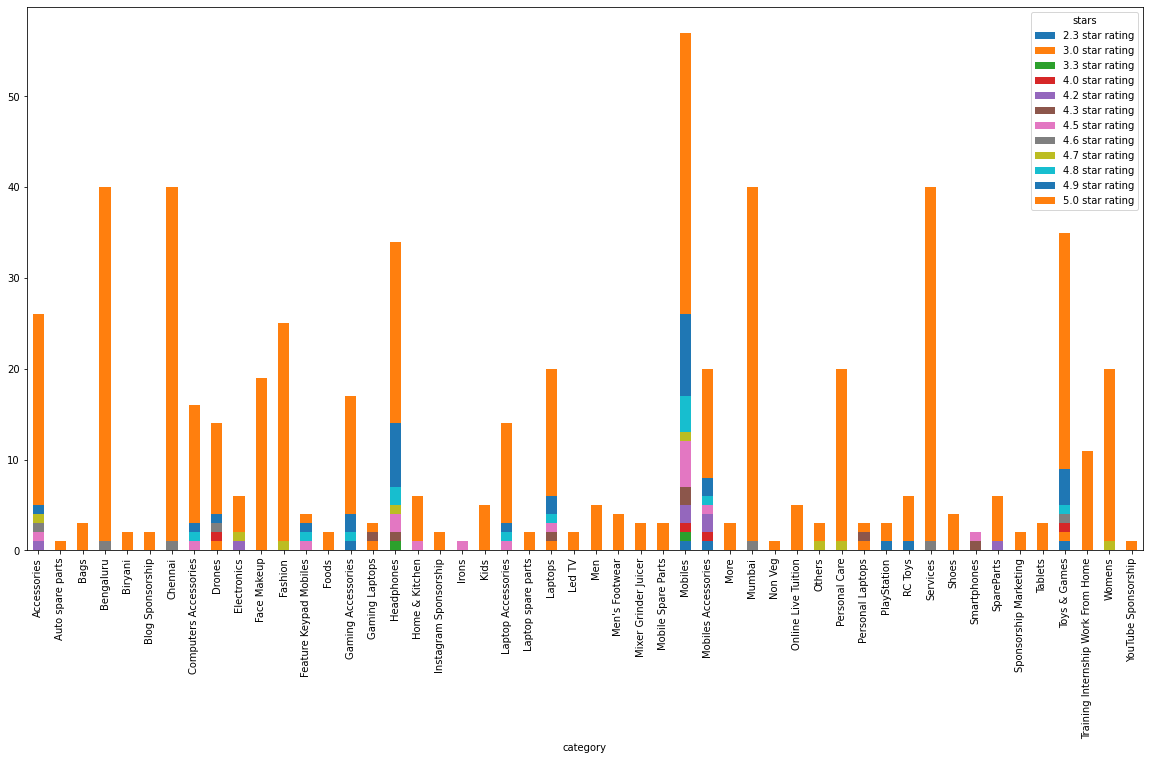

In [121]:
#two-way table to visualize analysis of reviews for all product categories
grouped = df7.groupby(['stars','category'])
grouped.size()
stars_color_table = pd.crosstab(index=df7["category"], 
                          columns=df7["stars"])

stars_color_table

stars_color_table.plot(kind="bar", figsize=(20,10), stacked=True)

# Enter 7 to see the analysis of Number of Orders Per Month Per Year

In [122]:
#Extracting time and date from order date and time stamp column
df6 = df3.dropna(subset=['Order Date and Time Stamp'])
df6['time'] = pd.to_datetime(df6['Order Date and Time Stamp'])
df6['dates'] = df6['time'].dt.date
df6['dates']
#rewritting into orders3 and reading orders3 into df8
df6.to_csv("orders3.csv", index=False)
df8 = pd.read_csv('orders3.csv')
df8['years'] = pd.to_datetime(df8['dates']).dt.year
df8['months'] = pd.to_datetime(df8['dates']).dt.month

<AxesSubplot:xlabel='years'>

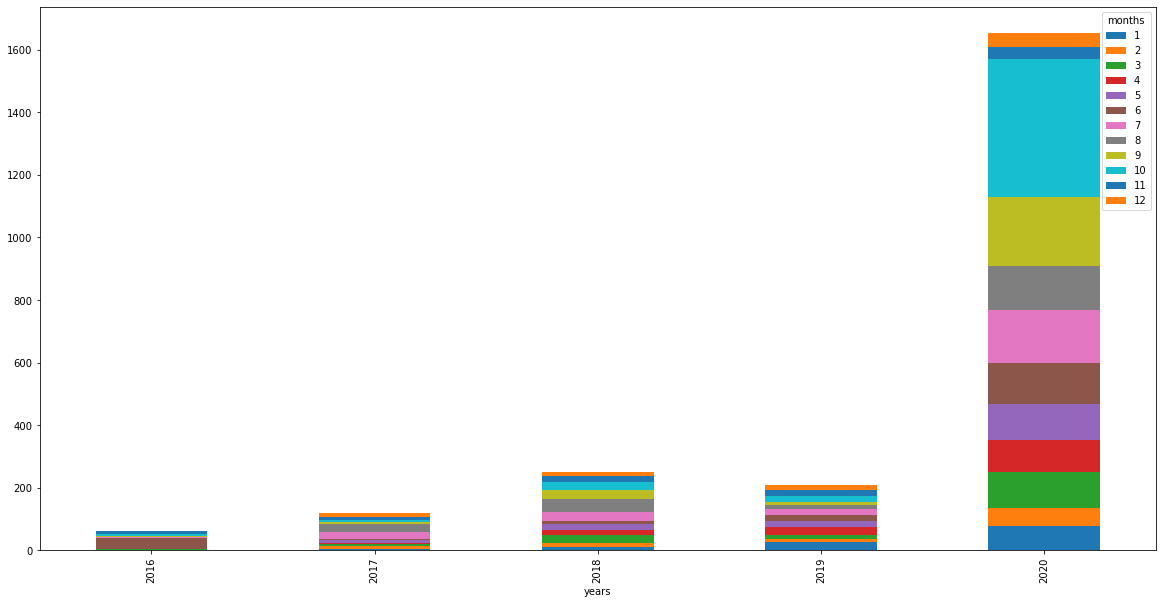

In [123]:
#Grouping by month and year it to visualize analysis of number of orders per month per year by two way table

grouped = df8.groupby(['months','years'])
grouped.size()
month_year_table = pd.crosstab(index=df8['years'], 
                          columns=df8['months'])

month_year_table
month_year_table.plot(kind="bar",figsize=(20,10),stacked=True)

In [124]:
# Conversion of stars to numeric
df7['stars'] = df7['stars'].replace(['5.0 star rating'],5)
df7['stars'] = df7['stars'].replace(['4.9 star rating'],4.9)
df7['stars'] = df7['stars'].replace(['4.8 star rating'],4.8)
df7['stars'] = df7['stars'].replace(['4.7 star rating'],4.7)
df7['stars'] = df7['stars'].replace(['4.6 star rating'],4.6)
df7['stars'] = df7['stars'].replace(['4.5 star rating'],4.5)
df7['stars'] = df7['stars'].replace(['4.3 star rating'],4.3)
df7['stars'] = df7['stars'].replace(['4.2 star rating'],4.2)
df7['stars'] = df7['stars'].replace(['4.0 star rating'],4)
df7['stars'] = df7['stars'].replace(['3.3 star rating'],3.3)
df7['stars'] = df7['stars'].replace(['3.0 star rating'],3)
df7['stars'] = df7['stars'].replace(['2.3 star rating'],2.3)

C:\Users\nawin\AppData\Local\Temp\ipykernel_17772\346690738.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nawin\AppData\Local\Temp\ipykernel_17772\346690738.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nawin\AppData\Local\Temp\ipykernel_17772\346690738.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [125]:
# unique values of stars
df7.stars.unique()

array([5. , 4.9, 4.6, 4.8, 4. , 3. , 2.3, 4.3, 4.7, 3.3, 4.2, 4.5])

In [126]:
df7['stars']

0       5.0
1       5.0
2       5.0
3       4.9
4       4.9
       ... 
1847    5.0
1848    5.0
1849    5.0
1852    5.0
1859    5.0
Name: stars, Length: 606, dtype: float64

In [127]:
#Joining two dataframe
df10 = df8.join(df7)
df10

,Order #,Order Date and Time Stamp,Fulfillment Status,Payment Status,Payment Date and Time Stamp,Fulfillment Date and Time Stamp,Currency,Subtotal,Shipping Method,Shipping Cost,...,LineItem Type,time,dates,years,months,product_name,product_url,category,status,stars
0,R929392577,09-11-2020 20:36:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,physical,2020-09-11 20:36:26+05:30,2020-09-11,2020,9,Sony PlayStation PS2 Gaming Console 150 GB Har...,https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,5.0
1,R653462960,09-11-2020 20:18:26 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,physical,2020-09-11 20:18:26+05:30,2020-09-11,2020,9,Vmax HX 750 Quadcopter Drone (No Camera),https://yoshops.com/products/hx-750-remote-con...,Toys & Games,Reviewd,5.0
2,R226302759,09-11-2020 19:56:21 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 799.00,Ships Free,₹ 0.00,...,physical,2020-09-11 19:56:21+05:30,2020-09-11,2020,9,Yoshops VR BOX Virtual Reality Glasses Headset...,https://yoshops.com/products/yoshops-vr-box-vi...,Toys & Games,Reviewd,5.0
3,R390235057,09-11-2020 19:37:40 +0530,Unfulfilled,Unpaid,NaN,NaN,INR,₹ 599.00,Ships Free,₹ 0.00,...,physical,2020-09-11 19:37:40+05:30,2020-09-11,2020,9,Sony PlayStation PS3 Console Slim 320 GB (Black),https://yoshops.com/products/sony-playstation-...,Toys & Games,Reviewd,4.9
4,R813855117,09-11-2020 18:35:47 +0530,Cancelled,Paid,NaN,NaN,INR,₹ 699.00,Ships Free,₹ 0.00,...,physical,2020-09-11 18:35:47+05:30,2020-09-11,2020,9,Barbie Doll (pink),https://yoshops.com/products/barbie-doll,Toys & Games,Reviewd,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,R243395005,05-10-2016 04:17:45 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 50.00,Ships Free,₹ 0.00,...,physical,2016-05-10 04:17:45+05:30,2016-05-10,2016,5,NaN,NaN,NaN,NaN,NaN
2293,R607209508,03-10-2016 15:10:47 +0530,Cancelled,Unpaid,NaN,NaN,INR,₹ 500.00,Ships Free,₹ 0.00,...,physical,2016-03-10 15:10:47+05:30,2016-03-10,2016,3,NaN,NaN,NaN,NaN,NaN
2294,R140316623,29-09-2016 18:33:27 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 4,000.00",Ships Free,₹ 0.00,...,physical,2016-09-29 18:33:27+05:30,2016-09-29,2016,9,NaN,NaN,NaN,NaN,NaN
2295,R192037084,28-09-2016 18:59:22 +0530,Cancelled,Unpaid,NaN,NaN,INR,"₹ 2,000.00",Ships Free,₹ 0.00,...,physical,2016-09-28 18:59:22+05:30,2016-09-28,2016,9,NaN,NaN,NaN,NaN,NaN


In [128]:
# Extract dates, time, year, month
df10['Dates'] = pd.to_datetime(df10['Fulfillment Date and Time Stamp']).dt.date
df10['Time'] = pd.to_datetime(df10['Fulfillment Date and Time Stamp']).dt.time
df10['years'] = pd.DatetimeIndex(df10['Dates']).year
df10['months'] = pd.DatetimeIndex(df10['Dates']).month

# Enter 8 to see the analysis of Number of Orders Across Parts of a Day

In [129]:
#extracting hour , minute , second
df6['timein'] = [d.time() for d in df6['time']]
df6['hourin'] = df6['time'].dt.hour
df6['minutein'] = df6['time'].dt.minute
df6['secondin'] = df6['time'].dt.second

In [130]:
#determining the parts of day
conditions = [(df6['hourin'] >=0 ) & (df6['hourin'] < 12),(df6['hourin'] >=12) & (df6['hourin'] <18),(df6['hourin'] >=18) & (df6['hourin'] <24)]

choices = ['Morning', 'Afternoon', 'Evening']

df6['parts'] = np.select(conditions, choices)

In [131]:
#rewriting into orders5
df6.to_csv("orders5.csv", index=False)
#reading orders5 into df11
df11 = pd.read_csv('orders5.csv')

In [132]:
# Grouping by hours and minute to visualize analysis number of orders by parts of day by plotly
dfparts = df11.groupby(['parts']).size().to_frame().sort_values([0], ascending = False).head(12).reset_index()
dfparts.columns = ['parts', 'Count']
fig = px.bar(dfparts, x='parts', y = 'Count')
fig.layout.yaxis.title.text = 'Count'
fig.show()